In [76]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np

In [77]:
path_to_xlsx = 'D:\\17.5.24\\DataFiles\\Ship\\ship_illustration.xlsx'

In [78]:
df = pd.read_excel(path_to_xlsx)

In [79]:
df

,Illustration Type,cluster_name,note,place,year,bid,pagenum,bb
0,Bump,SIL_03268,CK_Sphericity of the Water Element,Venice,1485,1928,14,"xywh=144,597,688,266"
1,Bump,SIL_03216,CK_Sphericity of the Water Element,Leipzig,1486,1616,15,"xywh=144,222,506,506"
2,Bump,SIL_00326,CK_Sphericity of the Water Element,Venice,1488,1924,27,"xywh=52,396,634,254"
3,Bump,SIL_01303,CK_Sphericity of the Water Element,Leipzig,1489,2200,18,"xywh=124,54,635,548"
4,Bump,SIL_01303,CK_Sphericity of the Water Element,Leipzig,1489,2201,16,"xywh=55,114,651,566"
...,...,...,...,...,...,...,...,...
322,Semicircle,SIL_02586,CK_Sphericity of the Water Element,Venice,1587,2255,379,"xywh=753,1014,534,271"
323,Semicircle,SIL_00038,CK_Sphericity of the Water Element,Neustadt an der Weinstraֳe,1590,2232,96,"xywh=44,104,507,231"
324,Semicircle,SIL_00025,CK_Sphericity of the Water Element,Venice,1598,1778,166,"xywh=220,974,502,306"
325,Semicircle,SIL_03551,CK_Sphericity of the Water Element,London,1599,2279,23,"xywh=292,592,927,570"


In [80]:
image_type_count = df['Illustration Type'].value_counts()

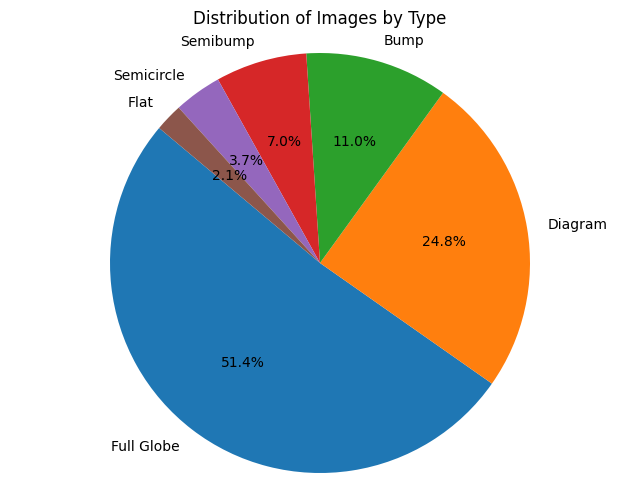

In [81]:
plt.figure(figsize=(8, 6))
plt.pie(image_type_count, labels=image_type_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [82]:
year_count = df['year'].value_counts().sort_index()

In [83]:
# Assuming 'years' is a column containing years in the Excel file
years = df['year'].values

# Find the range of years
min_year = years.min()
max_year = years.max()

print("Minimum year:", min_year)
print("Maximum year:", max_year)

Minimum year: 1485
Maximum year: 1647


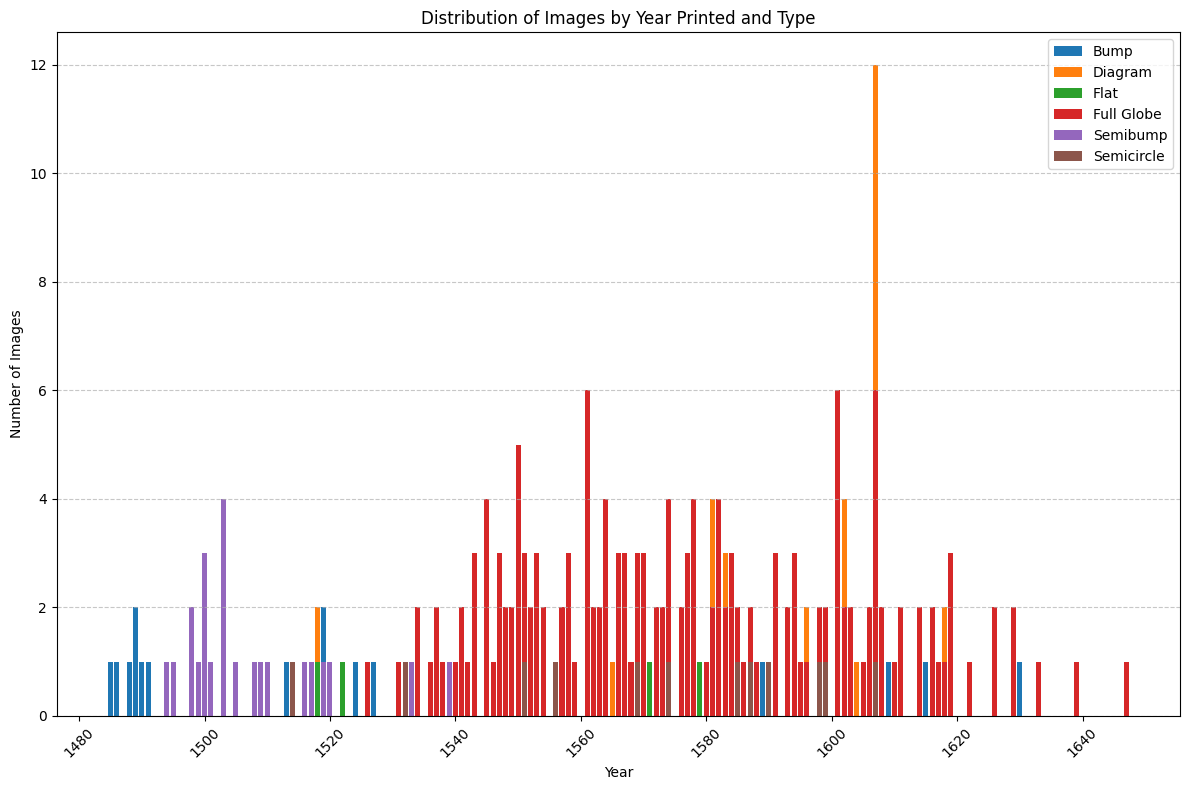

In [84]:
# Group the data by both 'Year' and 'Type', then count the occurrences
year_type_counts = df.groupby(['year', 'Illustration Type']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(12, 8))

# Loop through each type of image and plot a bar chart for each
for image_type in year_type_counts.columns:
    plt.bar(year_type_counts.index, year_type_counts[image_type], label=image_type)

plt.title('Distribution of Images by Year Printed and Type')
plt.xlabel('Year')
plt.ylabel('Number of Images')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

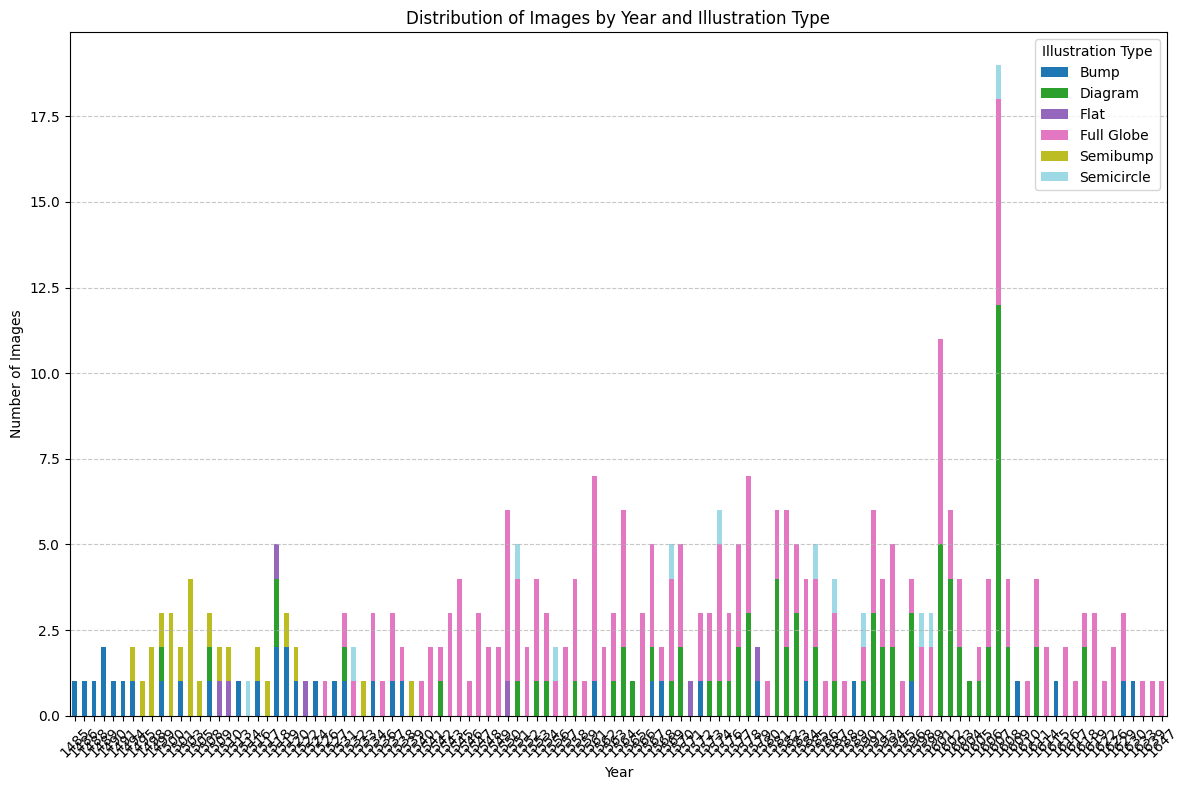

In [85]:
# Group the data by both 'Year' and 'Illustration Type', then count the occurrences
year_type_counts = df.groupby(['year', 'Illustration Type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))

# Plot a stacked bar chart
year_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Distribution of Images by Year and Illustration Type')
plt.xlabel('Year')
plt.ylabel('Number of Images')
plt.legend(title='Illustration Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

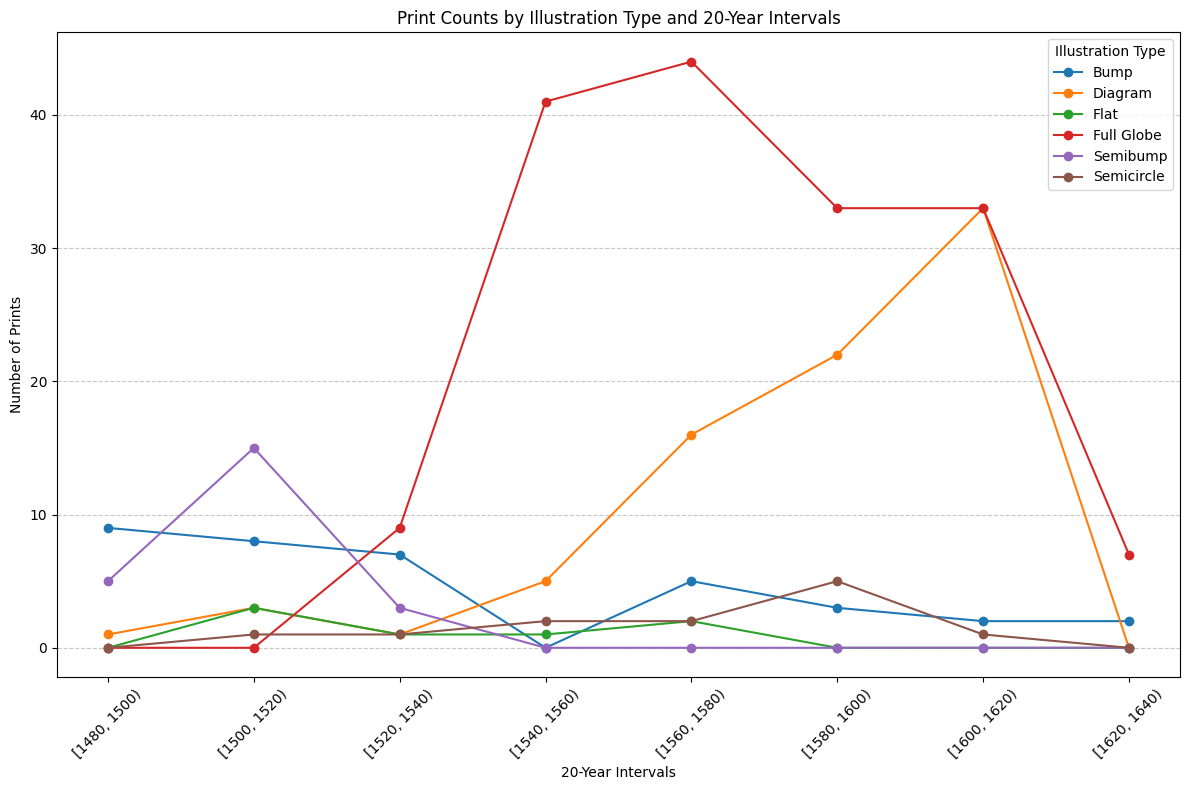

In [89]:

# Create a new column for 20-year intervals
df['year_interval'] = pd.cut(df['year'], bins=np.arange(1480, 1660, 20), right=False)

# Group by 'Illustration Type' and 'year_interval', count occurrences
year_type_counts = df.groupby(['Illustration Type', 'year_interval'], observed=False).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))

# Extract interval edges for x-axis
interval_edges = year_type_counts.columns.astype(str)  # Convert to string for plotting

# Plot each illustration type as a line
for illustration_type, counts in year_type_counts.iterrows():
    plt.plot(interval_edges, counts.values, marker='o', label=illustration_type)

plt.title('Print Counts by Illustration Type and 20-Year Intervals')
plt.xlabel('20-Year Intervals')
plt.ylabel('Number of Prints')
plt.xticks(interval_edges, rotation=45)  # Adjust rotation as needed
plt.legend(title='Illustration Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()